# An Analysis of the Correlative Relationship Between Household Income and Health

## Team members:  Christina Tse, Fiony Van, Hayley Spenst, Kyle Jiang Yi

### Tutorial: TUT0101

### Group number: 4

# Introduction
This work focuses on the way that median household income associates with the rates of diabetes and high blood pressure, and mental health visit across Toronto neighbourhoods. 

The independent variable in this research is the median income of people in the community while the health conditions are the dependent variables. 

We used the data: Adult Health and Disease at Toronto Neighbourhoods in 2007 to conduct the analysis. Our research uses three different sections from it:
- Diabetes, High Blood Pressure, and Mental Health Visit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

# %pip install xlrd

from statsmodels.formula.api import ols

## Data

#### 'Adult Health and Disease’ Dataset from 2007
- Diseases/health concerns of interest 
- High blood pressure
- Mental health visits and diabetes

#### ‘All Socio-demographic (Census)’ from 2006
- Sociodemographic variables
- Median household income
- University education rates and Age

# Methods
To address our research question, we used the following methods:
- Join on neighbourhood ID to connect the `socdem` and `ahd` datasets
    - Only kept columns of interest: three sociodemographic variables and the rates of our three disease of interest
- Create a new column that ranks each neighbourhood by income quintiles from 0-4 
- Regression analysis to determine the relationship between the three sociodemographic variables and each disease
- Group each variable by income quintile, take the mean - is there a relationship?

In [2]:
diabetes_neighb = pd.read_excel("1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls", sheet_name="1_ahd_neighb_diabetes_2007", header = 12)
diabetes_neighb.head()

,Unnamed: 0,Unnamed: 1,Demographics ª,% With diabetes,LL (95% CI),UL (95% CI),Demographics ª.1,% With diabetes.1,LL (95% CI) .1,UL (95% CI) .1,...,Demographics ª.10,% With diabetes.10,LL (95% CI) .10,UL (95% CI) .10,Demographics ª.11,% With diabetes.11,LL (95% CI) .11,UL (95% CI) .11,Rate Ratio**.3,H/L/NS.3
0,1,West Humber-Clairville,13984,15.2,14.6,15.8,14041,13.0,12.4,13.5,...,2271,30.3,28.4,32.2,4278,32.7,31.3,34.1,1.18,H
1,2,Mount Olive-Silverstone-Jamestown,12539,15.3,14.7,16.0,13024,14.6,14.0,15.2,...,1562,35.7,33.3,38.0,2944,35.5,33.7,37.2,1.28,H
2,3,Thistletown-Beaumond Heights,4113,12.6,11.6,13.5,4332,11.5,10.6,12.4,...,1010,26.9,24.2,29.7,1816,30.0,27.8,32.1,1.08,NS
3,4,Rexdale-Kipling,4142,12.5,11.6,13.4,4569,11.4,10.5,12.2,...,1131,26.0,23.4,28.6,1956,29.4,27.4,31.4,1.06,NS
4,5,Elms-Old Rexdale,3727,12.8,11.8,13.8,4066,12.5,11.5,13.5,...,687,28.2,24.9,31.6,1205,29.6,27.0,32.2,1.06,NS


In [3]:
diabetes_neighb.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Demographics ª', '% With diabetes',
       'LL (95% CI) ', 'UL (95% CI) ', 'Demographics ª.1', '% With diabetes.1',
       'LL (95% CI) .1', 'UL (95% CI) .1', 'Demographics ª.2',
       '% With diabetes.2', 'LL (95% CI) .2', 'UL (95% CI) .2', 'Rate Ratio**',
       'H/L/NS', 'Demographics ª.3', '% With diabetes.3', 'LL (95% CI) .3',
       'UL (95% CI) .3', 'Demographics ª.4', '% With diabetes.4',
       'LL (95% CI) .4', 'UL (95% CI) .4', 'Demographics ª.5',
       '% With diabetes.5', 'LL (95% CI) .5', 'UL (95% CI) .5',
       'Rate Ratio**.1', 'H/L/NS.1', 'Demographics ª.6', '% With diabetes.6',
       'LL (95% CI) .6', 'UL (95% CI) .6', 'Demographics ª.7',
       '% With diabetes.7', 'LL (95% CI) .7', 'UL (95% CI) .7',
       'Demographics ª.8', '% With diabetes.8', 'LL (95% CI) .8',
       'UL (95% CI) .8', 'Rate Ratio**.2', 'H/L/NS.2', 'Demographics ª.9',
       '% With diabetes.9', 'LL (95% CI) .9', 'UL (95% CI) .9',
       'Demographics ª.10'

In [4]:
diabetes_rates = diabetes_neighb.iloc[:, [0, 1, 11]]
diabetes_rates

,Unnamed: 0,Unnamed: 1,% With diabetes.2
0,1,West Humber-Clairville,14.0
1,2,Mount Olive-Silverstone-Jamestown,14.9
2,3,Thistletown-Beaumond Heights,12.0
3,4,Rexdale-Kipling,11.9
4,5,Elms-Old Rexdale,12.7
...,...,...,...
135,136,West Hill,13.3
136,137,Woburn,13.6
137,138,Eglinton East,14.6
138,139,Scarborough Village,14.6


In [5]:
diabetes_cols = diabetes_rates.columns
diabetes_cols

Index(['Unnamed: 0', 'Unnamed: 1', '% With diabetes.2'], dtype='object')

In [6]:
diabetes_col_names = {diabetes_cols[0] : 'NeighID',
                    diabetes_cols[1] : 'Name',
                    diabetes_cols[2] : 'diabetes_pct'}

diabetes_rates.rename(columns=diabetes_col_names, inplace=True)
diabetes_rates.head()

/Users/fionyvan/opt/miniconda3/envs/env/lib/python3.9/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,NeighID,Name,diabetes_pct
0,1,West Humber-Clairville,14.0
1,2,Mount Olive-Silverstone-Jamestown,14.9
2,3,Thistletown-Beaumond Heights,12.0
3,4,Rexdale-Kipling,11.9
4,5,Elms-Old Rexdale,12.7


### Socdem neighbourhood df

In [7]:
fname = '1_socdem_neighb_2006-2.xls'
sname = 'socdem_2006'

socdem_neighb = pd.read_excel(fname, sheet_name = sname, header = 10)
socdem_neighb.head()

,Neighbourhood id,Neighbourhood Name,Total Population,% 19 and under,% 65 and over,% Living alone,% Aged 65+ living alone,% Lone parent families §,% 1 year mobility in population,Median household income before-tax $,...,% Less than high school education **,% With a University degree **,% No knowledge of English/French,% Recent immigrants-within 5 years,% Recent immigrants-within 10 years,% Immigrants,% Visible minority,"Top 3 Home Languages for non-English speaking households, #1","Top 3 Home Languages for non-English speaking households, #2","Top 3 Home Languages for non-English speaking households, #3"
0,1,West Humber-Clairville,32252,26.8,11.3,3.7,11.7,26.3,11.6,63413,...,18.4,22.9,5.4,12.2,22.1,60.0,77.9,Panjabi (Punjabi),Gujarati,Spanish
1,2,Mount Olive-Silverstone-Jamestown,32127,32.2,8.1,4.1,15.4,31.5,15.7,48146,...,20.1,23.6,7.6,22.2,35.1,67.1,85.3,Panjabi (Punjabi),Gujarati,Arabic
2,3,Thistletown-Beaumond Heights,9928,25.3,16.7,5.4,17.5,30.1,10.9,55032,...,16.7,20.7,5.0,9.7,19.3,55.9,53.8,Panjabi (Punjabi),Italian,Spanish
3,4,Rexdale-Kipling,10725,23.6,18.3,10.2,28.8,33.3,13.2,52428,...,15.3,18.8,3.0,8.3,14.0,47.2,41.8,Spanish,Panjabi (Punjabi),Croatian
4,5,Elms-Old Rexdale,9437,29.9,10.5,5.8,13.0,39.1,9.7,53779,...,15.2,18.8,3.6,9.8,18.2,53.8,60.5,Spanish,Italian,Urdu


In [8]:
socdem_neighb.columns

Index(['Neighbourhood id', 'Neighbourhood Name', 'Total Population',
       '% 19 and under', '% 65 and over', '% Living alone',
       '% Aged 65+ living alone', '% Lone parent families §',
       '% 1 year mobility in population',
       'Median household income before-tax $',
       'Median household income after-tax $ ‡',
       '% Families-Incidence of low income before-tax',
       '% Families-Incidence of low income after-tax ‡',
       '% Individuals-Incidence of low income before-tax',
       '% Individuals-Incidence of low income after-tax ‡',
       '% Rented Dwellings', '% Unemployment rate *',
       '% Not in labour force *', '% Less than high school education **',
       '% With a University degree **', '% No knowledge of English/French',
       '% Recent immigrants-within 5 years',
       '% Recent immigrants-within 10 years', '% Immigrants',
       '% Visible minority',
       'Top 3 Home Languages for non-English speaking households, #1',
       'Top 3 Home Languages 

In [9]:
socdem_cols = ['Neighbourhood id', 'Neighbourhood Name', 'Median household income before-tax $', '% With a University degree **', '% 65 and over']

socdem_neighb = socdem_neighb[socdem_cols]
socdem_neighb

,Neighbourhood id,Neighbourhood Name,Median household income before-tax $,% With a University degree **,% 65 and over
0,1,West Humber-Clairville,63413,22.9,11.3
1,2,Mount Olive-Silverstone-Jamestown,48146,23.6,8.1
2,3,Thistletown-Beaumond Heights,55032,20.7,16.7
3,4,Rexdale-Kipling,52428,18.8,18.3
4,5,Elms-Old Rexdale,53779,18.8,10.5
...,...,...,...,...,...
135,136,West Hill,46739,17.9,13.1
136,137,Woburn,49306,28.7,13.8
137,138,Eglinton East,43934,22.6,12.8
138,139,Scarborough Village,42417,22.7,13.5


In [10]:
socdem_col_names = {socdem_cols[0] : 'NeighID',
                    socdem_cols[1] : 'Neigh Name',
                    socdem_cols[2] : 'median_income',
                    socdem_cols[3] : 'uni_degree',
                    socdem_cols[4] : 'age_65_over'}

socdem_neighb.rename(columns=socdem_col_names, inplace=True)
socdem_neighb

,NeighID,Neigh Name,median_income,uni_degree,age_65_over
0,1,West Humber-Clairville,63413,22.9,11.3
1,2,Mount Olive-Silverstone-Jamestown,48146,23.6,8.1
2,3,Thistletown-Beaumond Heights,55032,20.7,16.7
3,4,Rexdale-Kipling,52428,18.8,18.3
4,5,Elms-Old Rexdale,53779,18.8,10.5
...,...,...,...,...,...
135,136,West Hill,46739,17.9,13.1
136,137,Woburn,49306,28.7,13.8
137,138,Eglinton East,43934,22.6,12.8
138,139,Scarborough Village,42417,22.7,13.5


### Adding quintiles for median income into df ```soc_dem```

In [11]:
socdem_neighb['income_quintile'] = pd.qcut(socdem_neighb['median_income'], q=5, labels=False)
socdem_neighb

,NeighID,Neigh Name,median_income,uni_degree,age_65_over,income_quintile
0,1,West Humber-Clairville,63413,22.9,11.3,3
1,2,Mount Olive-Silverstone-Jamestown,48146,23.6,8.1,1
2,3,Thistletown-Beaumond Heights,55032,20.7,16.7,2
3,4,Rexdale-Kipling,52428,18.8,18.3,2
4,5,Elms-Old Rexdale,53779,18.8,10.5,2
...,...,...,...,...,...,...
135,136,West Hill,46739,17.9,13.1,1
136,137,Woburn,49306,28.7,13.8,1
137,138,Eglinton East,43934,22.6,12.8,0
138,139,Scarborough Village,42417,22.7,13.5,0


# Result

#### Diabetes

In [12]:
diabetes_socdem = diabetes_rates.merge(socdem_neighb, on='NeighID')
diabetes_socdem.head()

,NeighID,Name,diabetes_pct,Neigh Name,median_income,uni_degree,age_65_over,income_quintile
0,1,West Humber-Clairville,14.0,West Humber-Clairville,63413,22.9,11.3,3
1,2,Mount Olive-Silverstone-Jamestown,14.9,Mount Olive-Silverstone-Jamestown,48146,23.6,8.1,1
2,3,Thistletown-Beaumond Heights,12.0,Thistletown-Beaumond Heights,55032,20.7,16.7,2
3,4,Rexdale-Kipling,11.9,Rexdale-Kipling,52428,18.8,18.3,2
4,5,Elms-Old Rexdale,12.7,Elms-Old Rexdale,53779,18.8,10.5,2


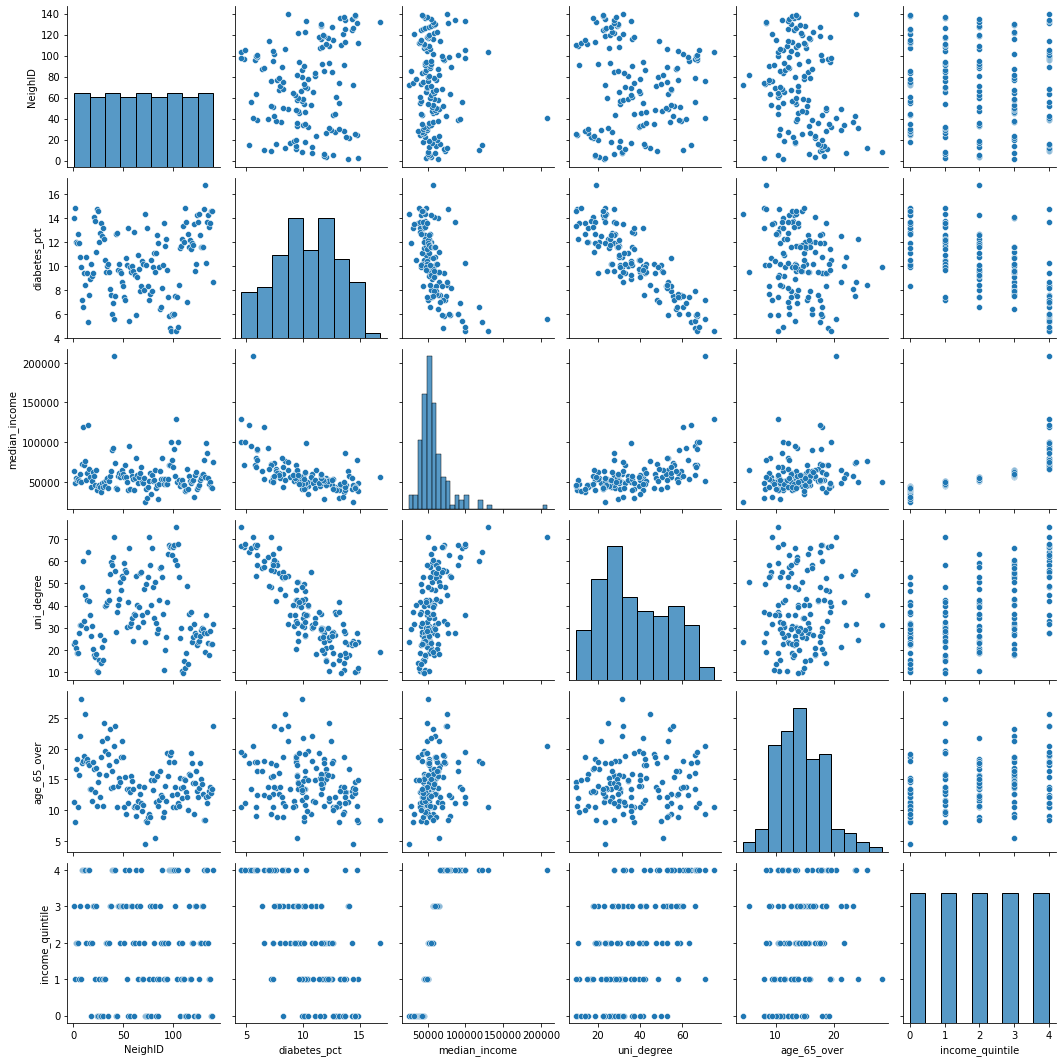

In [13]:
sns.pairplot(diabetes_socdem)

In [14]:
reg_diabetes = ols('diabetes_pct ~ median_income + uni_degree + age_65_over', data = diabetes_socdem)   # set up multi regression model
reg_diabetes_fit = reg_diabetes.fit() # estimate/fit the model 

In [15]:
reg_diabetes_summary = reg_diabetes_fit.summary()

reg_diabetes_summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.6168,0.446,39.464,0.000,16.734,18.500
median_income,-1.615e-05,5.98e-06,-2.702,0.008,-2.8e-05,-4.33e-06
uni_degree,-0.1327,0.008,-17.416,0.000,-0.148,-0.118
age_65_over,-0.0930,0.026,-3.580,0.000,-0.144,-0.042


This shows the regression summary of diabetes with sociodemographic variables of concern.

In [16]:
reg_diabetes_fit.rsquared

0.8052559356166837

Text(0, 0.5, 'residuals')

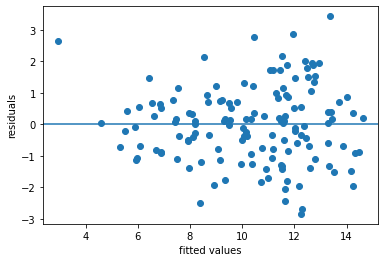

In [17]:
plt.scatter(x = reg_diabetes_fit.fittedvalues , y = reg_diabetes_fit.resid)
plt.axhline(y = 0)
plt.xlabel('fitted values')
plt.ylabel('residuals')

#### High blood pressure

In [18]:
hbp_neighb = pd.read_excel("1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls", sheet_name="1_ahd_neighb_hbp_2007", header = 11)
hbp_neighb.head()

,Unnamed: 0,Unnamed: 1,Demographics ª,% With high blood pressure,LL (95% CI),UL (95% CI),Demographics ª.1,% With high blood pressure.1,LL (95% CI) .1,UL (95% CI) .1,...,Demographics ª.10,% With high blood pressure.10,LL (95% CI) .10,UL (95% CI) .10,Demographics ª.11,% With high blood pressure.11,LL (95% CI) .11,UL (95% CI) .11,Rate Ratio**.3,H/L/NS.3
0,1,West Humber-Clairville,13984,25.4,24.7,26.0,14041,28.1,27.4,28.7,...,2271,71.0,69.1,72.8,4278,69.2,67.8,70.6,1.01,NS
1,2,Mount Olive-Silverstone-Jamestown,12539,24.4,23.7,25.0,13024,27.4,26.8,28.1,...,1562,71.6,69.3,73.8,2944,69.0,67.3,70.6,1.01,NS
2,3,Thistletown-Beaumond Heights,4113,24.6,23.5,25.7,4332,26.9,25.8,27.9,...,1010,72.6,69.8,75.3,1816,70.7,68.6,72.8,1.03,NS
3,4,Rexdale-Kipling,4142,23.3,22.3,24.4,4569,27.1,26.0,28.1,...,1131,73.0,70.4,75.6,1956,70.8,68.8,72.8,1.03,H
4,5,Elms-Old Rexdale,3727,24.9,23.7,26.1,4066,26.6,25.4,27.7,...,687,68.4,64.9,71.9,1205,68.3,65.7,70.9,1.00,NS


In [19]:
hbp_cols = hbp_neighb.columns[[0, 1, 11]]

hbp_neighb = hbp_neighb[hbp_cols]
hbp_neighb.head()


,Unnamed: 0,Unnamed: 1,% With high blood pressure.2
0,1,West Humber-Clairville,26.8
1,2,Mount Olive-Silverstone-Jamestown,26.0
2,3,Thistletown-Beaumond Heights,25.8
3,4,Rexdale-Kipling,25.3
4,5,Elms-Old Rexdale,25.8


In [20]:
hbp_col_rename = {hbp_cols[0] : 'NeighID',
                hbp_cols[1] : 'Name',
                hbp_cols[2] : 'hbp_pct'}

hbp_rates = hbp_neighb.rename(columns=hbp_col_rename, inplace=False)

hbp_rates

,NeighID,Name,hbp_pct
0,1,West Humber-Clairville,26.8
1,2,Mount Olive-Silverstone-Jamestown,26.0
2,3,Thistletown-Beaumond Heights,25.8
3,4,Rexdale-Kipling,25.3
4,5,Elms-Old Rexdale,25.8
...,...,...,...
135,136,West Hill,27.2
136,137,Woburn,25.6
137,138,Eglinton East,27.0
138,139,Scarborough Village,26.6


In [21]:
hbp_socdem = hbp_rates.merge(socdem_neighb, on='NeighID')
hbp_socdem.head()

,NeighID,Name,hbp_pct,Neigh Name,median_income,uni_degree,age_65_over,income_quintile
0,1,West Humber-Clairville,26.8,West Humber-Clairville,63413,22.9,11.3,3
1,2,Mount Olive-Silverstone-Jamestown,26.0,Mount Olive-Silverstone-Jamestown,48146,23.6,8.1,1
2,3,Thistletown-Beaumond Heights,25.8,Thistletown-Beaumond Heights,55032,20.7,16.7,2
3,4,Rexdale-Kipling,25.3,Rexdale-Kipling,52428,18.8,18.3,2
4,5,Elms-Old Rexdale,25.8,Elms-Old Rexdale,53779,18.8,10.5,2


In [22]:
reg_hbp = ols('hbp_pct ~ median_income + uni_degree + age_65_over', data = hbp_socdem)   # set up multi regression model
reg_hbp_fit = reg_hbp.fit() # estimate/fit the model 

In [23]:
reg_hbp_summary = reg_hbp_fit.summary()

reg_hbp_summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,28.6142,0.362,79.118,0.000,27.899,29.329
median_income,4.639e-07,4.84e-06,0.096,0.924,-9.11e-06,1e-05
uni_degree,-0.1502,0.006,-24.326,0.000,-0.162,-0.138
age_65_over,0.0202,0.021,0.961,0.338,-0.021,0.062


This shows the regression summary between high blood pressure with sociodemographic factors of concern. 

In [24]:
reg_hbp_fit.rsquared

0.8631329921854368

#### Mental health visits

In [25]:
mhv_neighb = pd.read_excel("1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls", sheet_name="1_ahd_neighb_mentalHV_2007", header = 11)
mhv_neighb.head()

,Unnamed: 0,Unnamed: 1,Demographics ª,% With mental health visits,LL (95% CI),UL (95% CI),Demographics ª.1,% With mental health visits.1,LL (95% CI) .1,UL (95% CI) .1,...,Demographics ª.10,% With mental health visits.10,LL (95% CI) .10,UL (95% CI) .10,Demographics ª.11,% With mental health visits.11,LL (95% CI) .11,UL (95% CI) .11,Rate Ratio**.3,H/L/NS.3
0,1,West Humber-Clairville,13984,10.3,9.8,10.8,14041,12.6,12.1,13.2,...,2271,10.6,9.3,11.9,4278,10.6,9.7,11.5,0.82,L
1,2,Mount Olive-Silverstone-Jamestown,12539,9.9,9.4,10.5,13024,13.2,12.6,13.8,...,1562,12.9,11.3,14.6,2944,12.3,11.1,13.5,0.95,NS
2,3,Thistletown-Beaumond Heights,4113,10.1,9.1,11.0,4332,13.8,12.8,14.8,...,1010,11.3,9.3,13.2,1816,10.4,9.0,11.8,0.81,L
3,4,Rexdale-Kipling,4142,11.3,10.3,12.3,4569,15.6,14.5,16.6,...,1131,14.9,12.8,16.9,1956,13.8,12.3,15.3,1.07,NS
4,5,Elms-Old Rexdale,3727,11.0,10.0,12.0,4066,16.1,15.0,17.2,...,687,14.4,11.8,17.0,1205,13.4,11.5,15.4,1.04,NS


In [26]:
mhv_cols = mhv_neighb.columns[[0, 1, 11]]

mhv_neighb = mhv_neighb[mhv_cols]
mhv_neighb.head()


,Unnamed: 0,Unnamed: 1,% With mental health visits.2
0,1,West Humber-Clairville,11.5
1,2,Mount Olive-Silverstone-Jamestown,11.7
2,3,Thistletown-Beaumond Heights,12.0
3,4,Rexdale-Kipling,13.5
4,5,Elms-Old Rexdale,13.7


In [27]:
mhv_col_rename = {mhv_cols[0] : 'NeighID',
                mhv_cols[1] : 'Name',
                mhv_cols[2] : 'mhv_pct'}

mhv_rates = mhv_neighb.rename(columns=mhv_col_rename, inplace=False)

mhv_rates

,NeighID,Name,mhv_pct
0,1,West Humber-Clairville,11.5
1,2,Mount Olive-Silverstone-Jamestown,11.7
2,3,Thistletown-Beaumond Heights,12.0
3,4,Rexdale-Kipling,13.5
4,5,Elms-Old Rexdale,13.7
...,...,...,...
135,136,West Hill,13.2
136,137,Woburn,10.3
137,138,Eglinton East,11.8
138,139,Scarborough Village,13.5


In [28]:
mhv_socdem = mhv_rates.merge(socdem_neighb, on='NeighID')
mhv_socdem.head()

,NeighID,Name,mhv_pct,Neigh Name,median_income,uni_degree,age_65_over,income_quintile
0,1,West Humber-Clairville,11.5,West Humber-Clairville,63413,22.9,11.3,3
1,2,Mount Olive-Silverstone-Jamestown,11.7,Mount Olive-Silverstone-Jamestown,48146,23.6,8.1,1
2,3,Thistletown-Beaumond Heights,12.0,Thistletown-Beaumond Heights,55032,20.7,16.7,2
3,4,Rexdale-Kipling,13.5,Rexdale-Kipling,52428,18.8,18.3,2
4,5,Elms-Old Rexdale,13.7,Elms-Old Rexdale,53779,18.8,10.5,2


This regression summary shows the relationship between mental health visit and sociodemographic factors of concern. 

In [29]:
reg_mhv = ols('mhv_pct ~ median_income + uni_degree + age_65_over', data = mhv_socdem)   # set up multi regression model
reg_mhv_fit = reg_mhv.fit() # estimate/fit the model 

In [30]:
reg_mhv_summary = reg_mhv_fit.summary()

reg_mhv_summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,14.7336,0.496,29.691,0.000,13.752,15.715
median_income,-2.076e-05,6.64e-06,-3.124,0.002,-3.39e-05,-7.62e-06
uni_degree,-0.0162,0.008,-1.916,0.057,-0.033,0.001
age_65_over,-0.0140,0.029,-0.485,0.628,-0.071,0.043


In [31]:
reg_mhv_fit.rsquared

0.1881828045482763

In [32]:
main_socdem_neigh = socdem_neighb.copy()

diabetes_rate = diabetes_rates.diabetes_pct
hbp_rate = hbp_rates.hbp_pct
mhv_rate = mhv_rates.mhv_pct

main_socdem_neigh = pd.concat([main_socdem_neigh, diabetes_rate, hbp_rate, mhv_rate], axis=1)
main_socdem_neigh

,NeighID,Neigh Name,median_income,uni_degree,age_65_over,income_quintile,diabetes_pct,hbp_pct,mhv_pct
0,1,West Humber-Clairville,63413,22.9,11.3,3,14.0,26.8,11.5
1,2,Mount Olive-Silverstone-Jamestown,48146,23.6,8.1,1,14.9,26.0,11.7
2,3,Thistletown-Beaumond Heights,55032,20.7,16.7,2,12.0,25.8,12.0
3,4,Rexdale-Kipling,52428,18.8,18.3,2,11.9,25.3,13.5
4,5,Elms-Old Rexdale,53779,18.8,10.5,2,12.7,25.8,13.7
...,...,...,...,...,...,...,...,...,...
135,136,West Hill,46739,17.9,13.1,1,13.3,27.2,13.2
136,137,Woburn,49306,28.7,13.8,1,13.6,25.6,10.3
137,138,Eglinton East,43934,22.6,12.8,0,14.6,27.0,11.8
138,139,Scarborough Village,42417,22.7,13.5,0,14.6,26.6,13.5


## Regression plots of median income, age over 65 and % with university degree against each disease

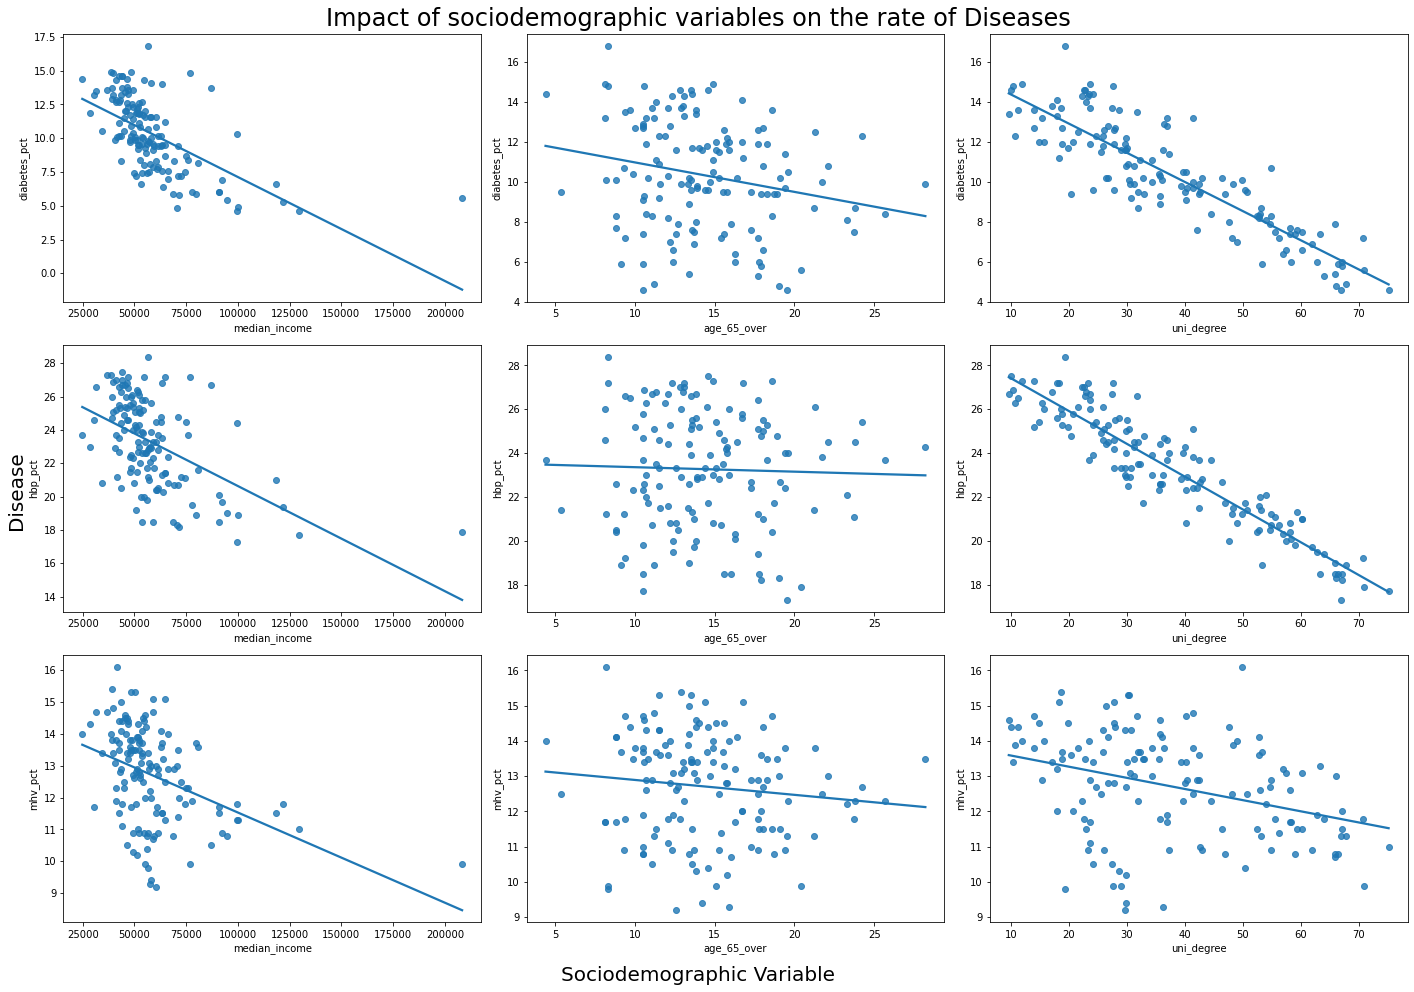

In [33]:

fig, ax = plt.subplots(3, 3, figsize=(20, 14))

sns.regplot(y = 'diabetes_pct', x = 'median_income', data = diabetes_socdem, ci = None,ax=ax[0][0])
sns.regplot(y = 'diabetes_pct', x = 'age_65_over', data = diabetes_socdem, ci = None, ax=ax[0][1])
sns.regplot(y = 'diabetes_pct', x = 'uni_degree', data = diabetes_socdem, ci = None, ax=ax[0][2])

sns.regplot(y = 'hbp_pct', x = 'median_income', data = hbp_socdem, ci = None, ax=ax[1][0])
sns.regplot(y = 'hbp_pct', x = 'age_65_over', data = hbp_socdem, ci = None, ax=ax[1][1])
sns.regplot(y = 'hbp_pct', x = 'uni_degree', data = hbp_socdem, ci = None, ax=ax[1][2])

sns.regplot(y = 'mhv_pct', x = 'median_income', data = mhv_socdem, ci = None, ax=ax[2][0])
sns.regplot(y = 'mhv_pct', x = 'age_65_over', data = mhv_socdem, ci = None, ax=ax[2][1])
sns.regplot(y = 'mhv_pct', x = 'uni_degree', data = mhv_socdem, ci = None, ax=ax[2][2])

fig.suptitle('Impact of sociodemographic variables on the rate of Diseases', size = 24)
fig.supxlabel('Sociodemographic Variable', size = 20)
fig.supylabel('Disease', size = 20)
fig.tight_layout()


<AxesSubplot:xlabel='median_income', ylabel='diabetes_pct'>

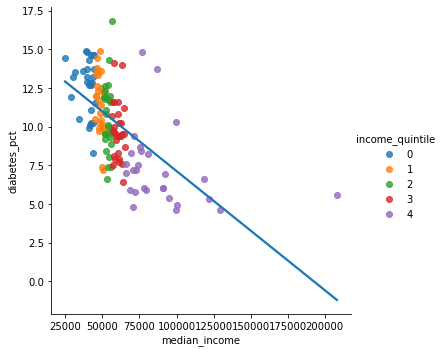

In [34]:
sns.lmplot(x='median_income', y='diabetes_pct', data=main_socdem_neigh, hue= 'income_quintile', fit_reg=False, ci=False)
sns.regplot(y = 'diabetes_pct', x = 'median_income', data = diabetes_socdem, ci = None, scatter=False)

# Conclusion

This research concludes that the sociodemographic aspects are not always linked to the general health condition of the person. Different aspects may be linked to the different health conditions per se.

This could be a good implication to Toronto community planning that this could be a good implication to Toronto community planning that communities with different socio demographics may impose higher risk in certain kinds of health risk.  
